# Capstone 2 - Customer Personality Analysis

# Latar Belakang
Sebuah perusahaan ingin melihat sebaran profil, barang, dan media yang digunakan oleh para pelanggan. Hal ini diperlukan untuk melihat pelanggan yang paling ideal pada berbagai kebutuhan.

# Pernyataan masalah
Perusahaan ingin mengeluarkan produk terbaru, dan ingin memilih **segmentasi pasar yang tepat, yang bisa dijadikan acuan untuk produk baru mereka**. Dalam hal ini, segmentasi pasar yang diinginkan adalah para pelanggan yang membeli dengan jumlah pembelian yang banyak, dan melakukan pembelian berulang-ulang.

**Perusahaan mengharapkan rekomendasi untuk mencari konsumen yg akan melakukan pembelian dengan jumlah yang besar, dengan jangka waktu berulang**. Sebagai seorang data analyst, kita akan mencoba menyelesaikan permasalahan berikut.

**Apa rekomendasi segmentasi pelanggan yang diharapkan akan melakukan pembelian di perusahaan tersebut?**

# Data Understanding
Data yang digunakan adalah dataset bernama `Customer Personality Analysis`.

Secara garis besar, data tersebut dapat dibagi kedalam 4 bagian besar:
* People (berisi id dan profil dari para pelanggan)
* Products (berisi detil dari penjualan product tersebut)
* Promotion (berisi informasi konversi offering/marketing menjadi sales/penjualan)
* Place (berisi informasi nilai pembelian dari masing-masing pelanggan, untuk setiap metode pemasaran)

In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

`Informasi Tabel Secara Detil`

* People
    * ID: Customer's unique identifier
    * Year_Birth: Customer's birth year
    * Education: Customer's education level
    * Marital_Status: Customer's marital status
    * Income: Customer's yearly household income
    * Kidhome: Number of children in customer's household
    * Teenhome: Number of teenagers in customer's household
    * Dt_Customer: Date of customer's enrollment with the company
    * Recency: Number of days since customer's last purchase
    * Complain: 1 if the customer complained in the last 2 years, 0 otherwise

* Products
    * MntWines: Amount spent on wine in last 2 years
    * MntFruits: Amount spent on fruits in last 2 years
    * MntMeatProducts: Amount spent on meat in last 2 years
    * MntFishProducts: Amount spent on fish in last 2 years
    * MntSweetProducts: Amount spent on sweets in last 2 years
    * MntGoldProds: Amount spent on gold in last 2 years

* Promotion
    * NumDealsPurchases: Number of purchases made with a discount
    * AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    * AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    * AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    * AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    * AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    * Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

* Place
    * NumWebPurchases: Number of purchases made through the company’s website
    * NumCatalogPurchases: Number of purchases made using a catalogue
    * NumStorePurchases: Number of purchases made directly in stores
    * NumWebVisitsMonth: Number of visits to company’s website in the last month


# Data Understanding and Pre-Processing

Hal ini kita perlukan untuk memahami bisnis dari perusahaan ini, selain itu kita juga perlu melihat data yang kosong (NaN) dan outlier (dalam hal ini data yang tidak masuk akal). Selain itu setiap penanganan akan disertai dengan justifikasi dalam pengambilan keputusan

In [3]:
# dataset csv tersebut dipisahkan dengan tab ('\t'), sehingga saya membaca data dengan menambahkan parameter sep
# berikut adalah 5 data pertama dan terakhir dari dataset ini
df=pd.read_csv("C:/File/Purwadhika/2. Data Analysis/Capstone Modul 2/marketing_campaign.csv", sep='\t')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [4]:
print(f'Jumlah baris dan kolom di dataset ini adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset ini adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nu

In [5]:
# Untuk deskripsi data secara horizontal, saya menggunakan describe.T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


Text(0.5, 1.0, "Customer's Income by Age")

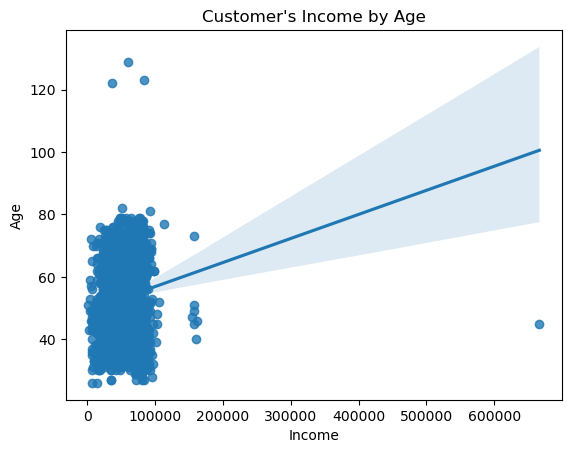

In [50]:
# Sebaran data income berdasarkan umur
sns.regplot(x=df['Income'], y=df['Age'])
plt.title("Customer's Income by Age")

In [131]:
df.isna().sum()

ID                     0
Year_Birth             0
Age                    0
Education              0
Degree                 0
Marital_Status         0
Partner                0
Income                 0
SClass                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [6]:
# Karna ada data Income yang NaN, saya memutuskan untuk mengisinya dengan median group by Marital Status & Education.
# Saya menggunakan median dikarenakan perbedaan antara quantile 3 dan max, dan quantile 1 dan min terlalu jauh, sehingga apabila menggunakan mean, dikhawatirkan menjadikan pengisian income tidak sesuai

df['Income']=df.groupby(['Education','Marital_Status'])['Income'].apply(lambda x: x.fillna(x.median()))
df.isna().sum()

# Kita dapat melihat dataset dengan jumlah NaN yang tidak ada

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [7]:
# Merujuk dari https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system
# Ketentuan status ekonomi adalah Low Income < $52,200  ;   Middle Income $52,200 - $156,600    ;   Upper Income > $156,600
# Atas ketentuan diatas, saya meniptakan kolom baru untuk memudahkan pembagian kategori pendapatan dari masing-masing pelanggan
# Kemudian Insert kolom Social Class berdasarkan Incomenya

df.insert(5, 'SClass', np.where(df['Income']<52200, 'Low', np.where((df['Income']>=52200)&(df['Income']<=156600),'Middle','Upper')))
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,SClass,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,Middle,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,Low,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,Middle,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,Low,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,Middle,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


In [8]:
# Menambahkan kolom age yang berisi umur.
# Dgn asumsi data ini diambil pada tahun 2022, maka saya menambahkan kolom age dgn rumus 2022-df['Year_Birth']
# Hal ini saya lakukan untuk mendapatkan perkiraan demografis umur dari para pelanggan
df.insert(2, 'Age', 2022-df['Year_Birth'])

In [9]:
# Menambahkan kolom partner untuk melihat status dari calon konsumen yang ada di database
# Saya menambahkan kolom ini, dengan tujuan untuk membagi para konsumen kedalam kategori, sendiri atau memiliki pasangan
# hal ini saya lakukan untuk dapat memperkirakan status hubungan dan perilaku total belanja konsumen
df.insert(5, 'Partner', df['Marital_Status'].replace({'Married':'Partner','Together':'Partner','Divorced':'Single','Widow':'Single','Alone':'Single','Absurd':'Single','YOLO':'Single'}))

In [10]:
# Untuk menyamakan tingkat edukasi, saya merubah 2n Cycle menjadi master degree (sesuai dgn klasifikasi pendidikan dari search engine)
df.insert(4, 'Degree', df['Education'].replace({'Graduation':'Bachelor','2n Cycle':'Master'}))

In [11]:
# 3 pelanggan yang umurnya diatas 100, saya drop dari data
# hal ini saya lakukan dikarenakan saya menganggap bahwa pelanggan diatas 100 relatif akan mendapatkan produk konsumsi dari teman/keluarganya
# sehingga saya merasa tidakdiperlukan data pelanggan yang berumur diatas 100 tahun untuk menjadi bahan pertimbangan pengolahan dataset
df.drop(df[df['Age']>100].index)

,ID,Year_Birth,Age,Education,Degree,Marital_Status,Partner,Income,SClass,Kidhome,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,65,Graduation,Bachelor,Single,Single,58138.0,Middle,0,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,68,Graduation,Bachelor,Single,Single,46344.0,Low,1,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,57,Graduation,Bachelor,Together,Partner,71613.0,Middle,0,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,38,Graduation,Bachelor,Together,Partner,26646.0,Low,1,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,41,PhD,PhD,Married,Partner,58293.0,Middle,1,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,55,Graduation,Bachelor,Married,Partner,61223.0,Middle,0,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,76,PhD,PhD,Together,Partner,64014.0,Middle,2,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,41,Graduation,Bachelor,Divorced,Single,56981.0,Middle,0,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,66,Master,Master,Together,Partner,69245.0,Middle,0,...,3,0,0,0,0,0,0,3,11,0


In [123]:
df.columns

Index(['ID', 'Year_Birth', 'Age', 'Education', 'Degree', 'Marital_Status',
       'Partner', 'Income', 'SClass', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# Exploratory Data Analysis

In [12]:
# Untuk mengetahui kolom yang tersedia saat ini untuk analisa
df.columns

Index(['ID', 'Year_Birth', 'Age', 'Education', 'Degree', 'Marital_Status',
       'Partner', 'Income', 'SClass', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## Products Gold

In [38]:
# Membuat Pivot Table
# Saya membuat pivot table untuk melihat sebaran konsumen berdasarkan tingkat pendidikan dan status hubungannya
df.pivot_table(values='MntGoldProds', index=['Degree','Partner'],columns='SClass',aggfunc='sum').sort_values(['Middle','Low'],ascending=False)

SClass               Low   Middle  Upper
Degree   Partner                        
Bachelor Partner  8554.0  27761.0   13.0
         Single   5279.0  15700.0    NaN
Master   Partner  4948.0  10304.0    8.0
PhD      Partner  1666.0   7833.0    8.0
Master   Single   2925.0   6181.0    NaN
PhD      Single   2155.0   4041.0    NaN
Basic    Partner   841.0      NaN    NaN
         Single    392.0      NaN    NaN

Dari tabel diatas, kita dapat melihat pelanggan yang paling banyak membeli emas adalah lulusan sarjana (S1) dengan status sosial menengah (middle), mulai dari yang memiliki pasangan, diikuti dengan yang single.

Untuk status sosial atas (upper) saya menganggap bahwa mereka cenderung relatif lebih menyukai produk investasi dengan tingkat return dan resiko menengah keatas seperti obligasi, reksadana campuran, ataupun saham.

Dari tabel diatas dapat kita simpulkan, produk low risk dan low return seperti emas, deposito, ataupun reksadana pasar uang merupakan produk yang banyak dibeli oleh pelanggan dengan demografi pendidikan lulusan sarjana (S1) dengan status sosial menengah (middle), mulai dari yang memiliki pasangan, diikuti dengan yang single. Kita bisa memanfaatkan informasi ini untuk melakukan penawaran produk-produk diatas.

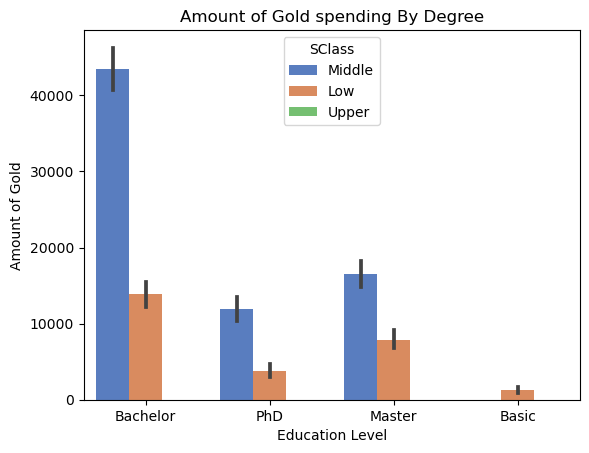

In [37]:
# barplot dibawah ini menjadi gambaran perbedaan jumlah pelanggan untuk produk gold
sns.barplot(data=dfg, y='MntGoldProds', x='Degree', hue='SClass', estimator=sum,palette='muted')
plt.title('Amount of Gold spending By Degree')
plt.xlabel('Education Level')
plt.ylabel('Amount of Gold')
plt.show()

Text(0, 0.5, 'Number of Purchases')

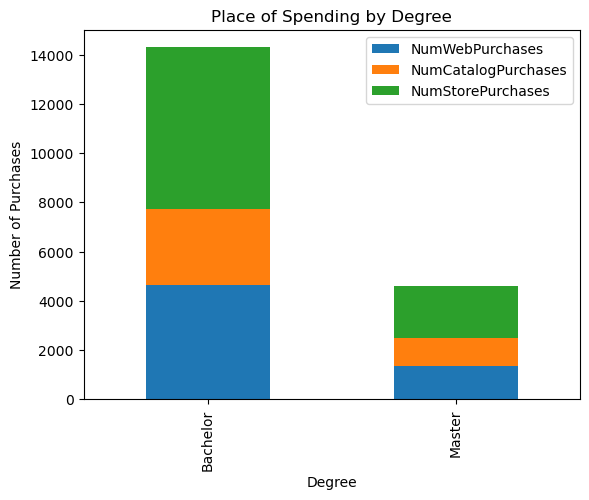

In [110]:
# Melihat tempat pembelian terbanyak berdasarkan Degree Bachelor dan Master
df[(df['Degree']=='Bachelor')|(df['Degree']=='Master')&(df['SClass']=='Middle')].groupby('Degree').sum()[["NumWebPurchases",'NumCatalogPurchases', 'NumStorePurchases']].rename(index={0:'Bachelor',1:'Master'}).plot(kind='bar',stacked=True)
plt.title('Place of Spending by Degree')
plt.ylabel('Number of Purchases')

## Products Wine

In [121]:
df.pivot_table(values='MntWines', index=['Degree','Partner'],columns='SClass',aggfunc='sum').sort_values(['Low','Middle'],ascending=False)

SClass                Low    Middle  Upper
Degree   Partner                          
Bachelor Partner  24899.0  182422.0   10.0
         Single   16492.0   96548.0    NaN
Master   Partner  16187.0   84394.0   39.0
PhD      Partner  12886.0  115379.0  162.0
         Single   11023.0   57135.0    NaN
Master   Single    9035.0   53814.0    NaN
Basic    Partner    332.0       NaN    NaN
         Single      59.0       NaN    NaN

Dari tabel diatas, kita dapat melihat pelanggan yang paling banyak membeli produk wine/alcohol adalah lulusan sarjana (S1) dengan status sosial menengah (middle), mulai dari yang memiliki pasangan, diikuti dengan yang single.

Untuk status sosial atas (upper) saya menganggap bahwa mereka cenderung relatif lebih menyukai produk dengan alcohol yang lebih tinggi, atau cenderung membeli wine yang tidak dijual oleh perusahaan.

Dari tabel diatas dapat kita simpulkan, produk minuman dengan alchol minim seperti wine merupakan produk yang banyak dibeli oleh pelanggan dengan demografi pendidikan lulusan sarjana (S1) dengan status sosial menengah (middle), kita juga dapat memanfaatkan informasi ini untuk melakukan penawaran produk-produk beralkohol rendah.

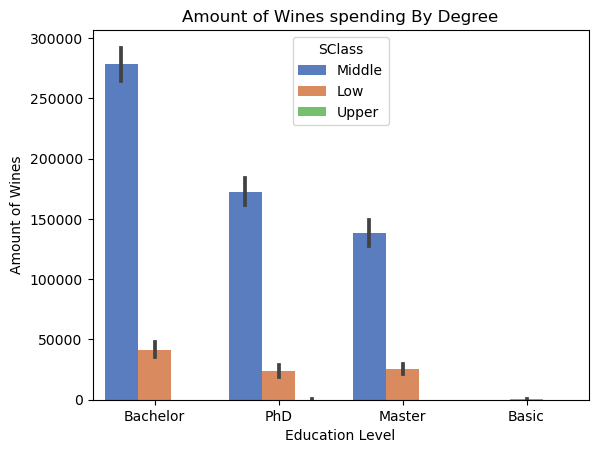

In [129]:
# barplot dibawah ini menjadi gambaran perbedaan jumlah pelanggan untuk produk wine, dimulai dari lulusan sarjana, dilanjuti oleh lulusan PhD
sns.barplot(data=df, y='MntWines', x='Degree', hue='SClass', estimator=sum,palette='muted')
plt.title('Amount of Wines spending By Degree')
plt.xlabel('Education Level')
plt.ylabel('Amount of Wines')
plt.show()

Text(0, 0.5, 'Number of Purchases')

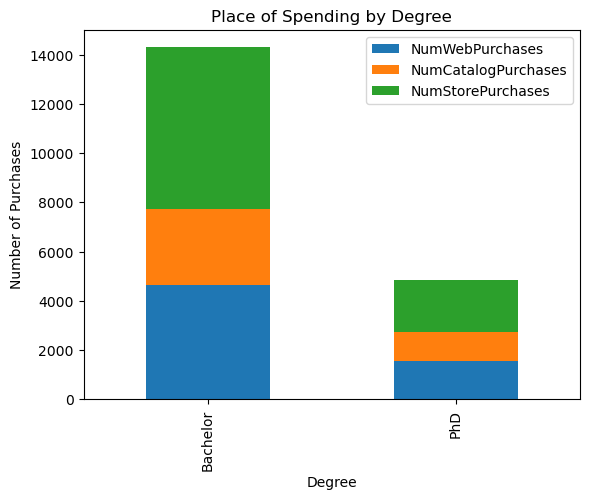

In [130]:
# Melihat tempat pembelian terbanyak berdasarkan Degree Bachelor dan PhD adalah melalui store langsung dan pembelian melalui website
df[(df['Degree']=='Bachelor')|(df['Degree']=='PhD')&(df['SClass']=='Middle')].groupby('Degree').sum()[["NumWebPurchases",'NumCatalogPurchases', 'NumStorePurchases']].rename(index={0:'Bachelor',1:'Master'}).plot(kind='bar',stacked=True)
plt.title('Place of Spending by Degree')
plt.ylabel('Number of Purchases')

# Sweet Products

In [21]:
df['Kidhome'].value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

Text(0.5, 0, 'Number of Kid at Home')

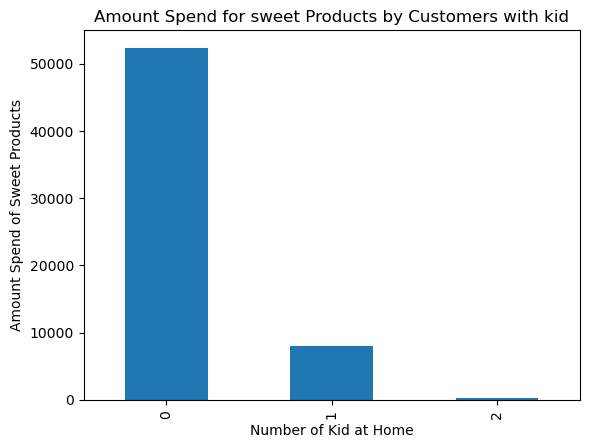

In [128]:
df.groupby('Kidhome').sum()['MntSweetProducts'].plot.bar()
plt.title('Amount Spend for sweet Products by Customers with kid')
plt.ylabel('Amount Spend of Sweet Products')
plt.xlabel('Number of Kid at Home')

plt.show()

Dari gambar diatas, kita bisa menarik kesimpulan bahwa jumlah total pembelian customer tanpa anak adalah yang terbanyak dari yang lain, hal ini bisa terjadi karena jumlah customer yang tidak memiliki anak kecil, lebih banyak dibandingkan jumlah customer yang memiliki anak kecil. Bagaimanapun juga, dengan asumsi bahwa dataset ini merupakan sampel dari populasi disebuah daerah, rekomendasi dari saya adalah untuk menawarkan produk manisan kepada customer yang tidak memiliki anak kecil.

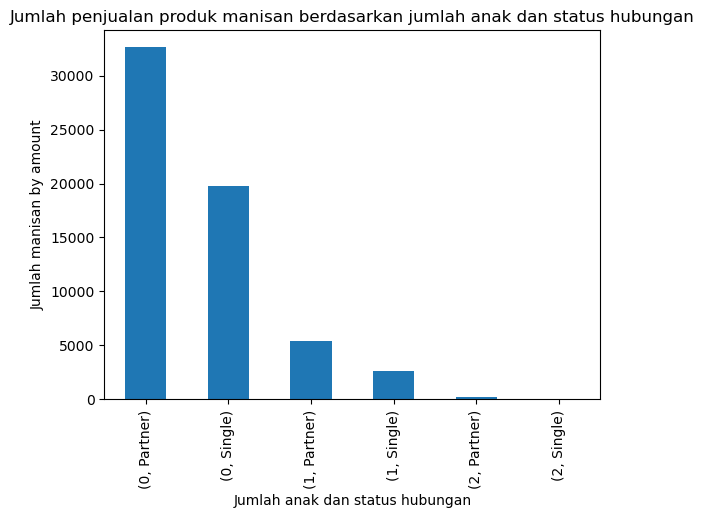

In [23]:
df.groupby(['Kidhome','Partner']).sum()['MntSweetProducts'].plot.bar()
plt.title('Jumlah penjualan produk manisan berdasarkan jumlah anak dan status hubungan')
plt.ylabel('Jumlah manisan by amount')
plt.xlabel('Jumlah anak dan status hubungan')

plt.show()
# dari gambar dibawah, kita bisa melihat konsumsi produk manisan terbanyak adalah dari pelanggan yang tidak memiliki anak
# hal ini dapat memberikan pertanyaan lanjutan, mungkin dikarenakan mereka membeli untuk keponakannya, atau memang pada 2 tahun terakhir, produk manisan akan diberi diskon apabila pembelinya tidak punya anak

In [139]:
df[(df['Recency']<30)&(df['SClass']=='Middle')|(df['Recency']<30)&(df['Degree']=='Bachelor')]

,ID,Year_Birth,Age,Education,Degree,Marital_Status,Partner,Income,SClass,Kidhome,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2,4141,1965,57,Graduation,Bachelor,Together,Partner,71613.0,Middle,0,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,38,Graduation,Bachelor,Together,Partner,26646.0,Low,1,...,6,0,0,0,0,0,0,3,11,0
5,7446,1967,55,Master,Master,Together,Partner,62513.0,Middle,0,...,6,0,0,0,0,0,0,3,11,0
10,1994,1983,39,Graduation,Bachelor,Married,Partner,50737.0,Low,1,...,7,0,0,0,0,0,0,3,11,0
15,2114,1946,76,PhD,PhD,Single,Single,82800.0,Middle,0,...,3,0,0,1,1,0,0,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,7366,1982,40,Master,Master,Single,Single,75777.0,Middle,0,...,1,0,1,1,0,0,0,3,11,1
2224,4286,1970,52,PhD,PhD,Single,Single,57642.0,Middle,0,...,4,1,0,0,0,0,0,3,11,0
2229,10084,1972,50,Graduation,Bachelor,Married,Partner,24434.0,Low,2,...,7,0,0,0,0,0,0,3,11,0
2233,9432,1977,45,Graduation,Bachelor,Together,Partner,666666.0,Upper,1,...,6,0,0,0,0,0,0,3,11,0


`Untuk mengakhiri analisa diatas, saya sebagai data analyst dapat merekomendasikan beberapa poin sebagai berikut:`
* Penjualan produk gold dapat ditawarkan kepada lulusan sarjana dengan status sosial menengah
* Begitu pula produk alcohol/wine direkomendasikan untuk ditawarkan kepada lulusan sarjana dan PhD dengan status sosial menengah
* Untuk produk manisan, tidak direkomendasikan untuk menawarkan produk pada pelanggan yang mempunyai anak, karena pada dataset dapat kita lihat bahwa pembelian terbesar adalah oleh para pelanggan yang tidak memiliki anak
* Selain itu, dengan mengambil kesimpulan status sosial middle dan pendidikan terakhir bachelor, sebagai data analyst saya dapat merekomendasikan pendekatan pada customer degan recency <30 hari, hal ini dikarenakan dengan pembelian berulang dibawah 30 hari, perusahaan akan mendapatkan cash flow yang berulang untuk dapat melaksanakan kewajiban biaya operasional seperti gaji, utilities, supplies, dll. yang biasanya dibayarkan setiap bulan, atau melakukan pendekatan agar mereka dapat melakukan pembelian lebih besar disetiap transaksi.
* Untuk segmentasi yang sama dengan recency > 30 hari, harapannya selain mereka melakukan pembelian dgn nilai yg lebih besar, perusahaan jg mampu melakukan pendekatan untuk mendorong mereka melakukan transaksi lebih sering, dan menurunkan recency dari masing-masing customer tersebut.